C:\Users\PC\AppData\Local\Temp\ipykernel_8892\1850986201.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').astype(float)


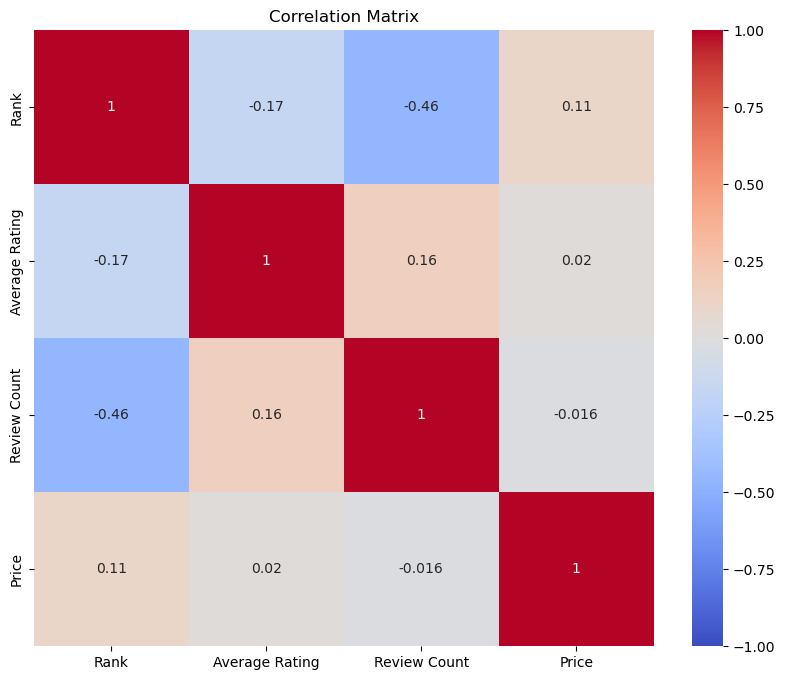

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('C:\\Users\\PC\\amazon_best_sellers_mens_tshirts.csv')

# Data Cleaning
# Remove '#' from 'Rank' and convert to integer
df['Rank'] = df['Rank'].str.replace('#', '').astype(int)

# Extract numeric value from 'Average Rating' and convert to float
df['Average Rating'] = df['Average Rating'].str.extract('(\d+\.\d+)').astype(float)

# Remove commas from 'Review Count' and convert to integer
df['Review Count'] = df['Review Count'].str.replace(',', '').astype(int)

# Remove '$' from 'Price' and convert to float
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Drop 'Product Name' column
df = df.drop(columns=['Product Name'])

# Examine Correlations
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()




In [6]:
import pandas as pd
import statsmodels.api as sm

# Assuming the dataset is loaded as 'parsed_dataset'

# 1. Is online advertising effective for Star Digital?
X = df[['Average Rating', 'Review Count', 'Price']]
y = df['Rank']
X1 = sm.add_constant(X)  # Adding a constant (intercept) to the model
model1 = sm.OLS(y, X).fit()
print(model1.summary())


                                 OLS Regression Results                                
Dep. Variable:                   Rank   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.797
Method:                 Least Squares   F-statistic:                              126.4
Date:                Mon, 02 Oct 2023   Prob (F-statistic):                    1.08e-32
Time:                        02:28:54   Log-Likelihood:                         -444.43
No. Observations:                  96   AIC:                                      894.9
Df Residuals:                      93   BIC:                                      902.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

The model explains about 80.3% of the variability in the Rank, which is a good fit.
The Average Rating and Review Count are significant predictors, while Price is not a statistically significant predictor for Rank.